In [1]:
import os


In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt


#Load the data and separate targets

youtube_file_path= 'train.csv'
home_data= pd.read_csv(youtube_file_path)
y=home_data.adview
home_data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


# Cleaning the data

In [3]:
#assigning numbers to each category

category={'A': 1, 'B':2, 'C': 3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8 }

home_data["category"]=home_data["category"].map(category)
home_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [4]:
#Removing character F present in data

home_data=home_data[home_data.views!='F']
home_data=home_data[home_data.comment!='F']
home_data=home_data[home_data.likes!='F']
home_data=home_data[home_data.dislikes!='F']
home_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [5]:
#Convert values to integers

home_data["views"]=pd.to_numeric(home_data["views"])
home_data["likes"]=pd.to_numeric(home_data["likes"])
home_data["dislikes"]=pd.to_numeric(home_data["dislikes"])
home_data["comment"]=pd.to_numeric(home_data["comment"])
home_data["adview"]=pd.to_numeric(home_data["adview"])

column_vidid=home_data["vidid"]

home_data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [6]:
#Encoding 

from sklearn.preprocessing import LabelEncoder
home_data['duration']=LabelEncoder().fit_transform(home_data['duration'])
home_data['vidid']=LabelEncoder().fit_transform(home_data['vidid'])
home_data['published']=LabelEncoder().fit_transform(home_data['published'])

home_data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [7]:
#convert time in sec

import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv(youtube_file_path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

home_data["duration"]=time1
home_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# Visualisation of data

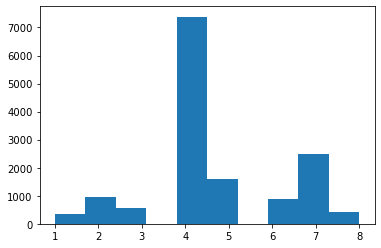

In [8]:
#Individual plots

plt.hist(home_data['category'])
plt.show()

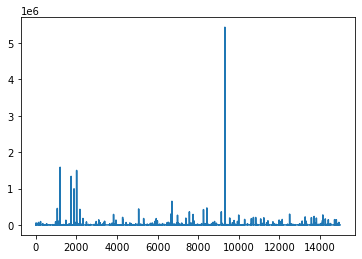

In [9]:
plt.plot(home_data['adview'])
plt.show()

In [10]:
#Remove videos with adview greater than 2000000 as outliers
home_data=home_data[home_data["adview"]<2000000]
home_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


C:\Users\sayed\AppData\Local\Temp/ipykernel_10360/1469441705.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


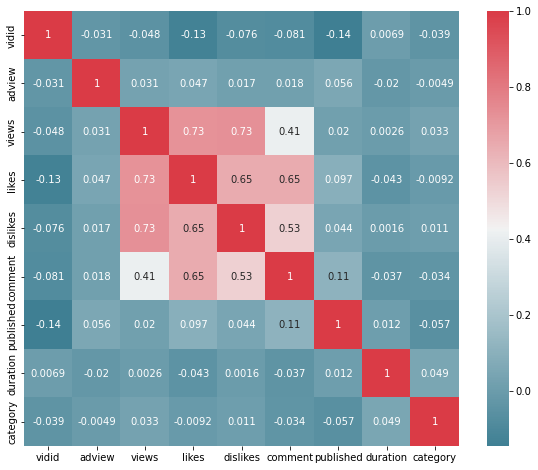

In [11]:
#heatmap

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = home_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

# Training the models

In [12]:
#Split data
train_Y = pd.DataFrame(data = home_data.iloc[:, 1].values, columns = ['target'])
home_data=home_data.drop(["adview"], axis=1)
home_data=home_data.drop(["vidid"], axis=1)

# Split into validation and training data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(home_data, train_Y, test_size=0.2, random_state=42)

train_X.shape


(11708, 7)

In [13]:
#Normalise data

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)

print(train_X.shape)
print(test_X.shape)

(11708, 7)
(2928, 7)


In [14]:
#evaluation metrics

from sklearn import metrics
from sklearn.metrics import r2_score

def print_error(test_X, test_y, model_name):
    prediction=model_name.predict(test_X)
    print("Mean absolute error: ", metrics.mean_absolute_error(test_y, prediction))
    print("Mean squared error: ", metrics.mean_squared_error(test_y, prediction))
    print("Root mean square error: ", np.sqrt(metrics.mean_squared_error(test_y, prediction)))
    print("R2 score: ", metrics.r2_score(test_y, prediction))


In [15]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(train_X, train_y)
print_error(test_X,test_y, linear_regression)

Mean absolute error:  3707.378005824529
Mean squared error:  835663131.1210335
Root mean square error:  28907.83857573986
R2 score:  -0.005841554563432938


In [16]:
#Support Vector Regressor
from sklearn.svm import SVR
support_vector_regressor=SVR()
support_vector_regressor.fit(train_X, train_y)
sv_val_pred=support_vector_regressor.predict(test_X)

print_error(test_X, test_y, support_vector_regressor)

C:\Users\sayed\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean absolute error:  1696.9438599505638
Mean squared error:  833685776.029172
Root mean square error:  28873.617300732723
R2 score:  -0.0034615214550512974


In [17]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(train_X, train_y)
print_error(test_X, test_y, decision_tree)

Mean absolute error:  2636.3616803278687
Mean squared error:  882365187.4361339
Root mean square error:  29704.632423851566
R2 score:  -0.0620542402448907


In [18]:
#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=25
min_samples_leafs=2
random_forest_model= RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest_model.fit(train_X, train_y)
print_error(test_X, test_y, random_forest_model)

C:\Users\sayed\AppData\Local\Temp/ipykernel_10360/1947450292.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(train_X, train_y)


Mean absolute error:  3370.5374727145836
Mean squared error:  671379667.5399349
Root mean square error:  25910.995109025334
R2 score:  0.19189737664417628


In [19]:
#Artificial neural network
from tensorflow import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=train_X.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(train_X,train_y,epochs=100)
ann.summary()
print_error(test_X,test_y,ann)


Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767408256.0000 - mean_squared_error: 767408256.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767404672.0000 - mean_squared_error: 767404672.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767391296.0000 - mean_squared_error: 767391296.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767364032.0000 - mean_squared_error: 767364032.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767317312.0000 - mean_squared_error: 767317312.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 767249728.0000 - mean_squared_error: 767249728.0000
Epoch 7/100
366/366 [==============================] - 1s 1ms/step - loss: 767163584.0000 - mean_squared_error: 767163584.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767059968.0000 - mean_squared_error:

In [20]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest_model, "random_forest_youtube_adview.pkl")
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# Testing the model

In [21]:
#test model
test_data_path='test.csv'

test_data = pd.read_csv(test_data_path)

In [22]:
#assigning numbers to each category

category={'A': 1, 'B':2, 'C': 3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8 }

test_data["category"]=test_data["category"].map(category)
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [23]:
#Removing character F present in data

test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.comment!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [24]:
#Convert values to integers

test_data["views"]=pd.to_numeric(test_data["views"])
test_data["likes"]=pd.to_numeric(test_data["likes"])
test_data["dislikes"]=pd.to_numeric(test_data["dislikes"])
test_data["comment"]=pd.to_numeric(test_data["comment"])

column_vidid=test_data["vidid"]

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [25]:
#Encoding 

from sklearn.preprocessing import LabelEncoder
test_data['duration']=LabelEncoder().fit_transform(test_data['duration'])
test_data['vidid']=LabelEncoder().fit_transform(test_data['vidid'])
test_data['published']=LabelEncoder().fit_transform(test_data['published'])

test_data.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [26]:
#convert time in sec

import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

test=pd.read_csv("test.csv")
mp = pd.read_csv(test_data_path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

test_data["duration"]=time1
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [27]:
#Drop column with missing value
test_data=test_data.drop(["vidid"], axis=1)

In [28]:
#Normalise data

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_test=test_data
X_test=scaler.fit_transform(X_test)

In [29]:
#Choosing Random Forest Regressor as the model
import joblib
joblib_file="random_forest_youtube_adview.pkl"
model=joblib.load(joblib_file)
test_preds=model.predict(X_test)

In [30]:
# Run the code to save predictions in the csv file and display a little

output = pd.DataFrame({'adview': test_preds})
print(output.head())                       
output.to_csv('prediction.csv', index=False)

        adview
0  1336.760240
1  1373.903341
2    77.270550
3   603.547007
4  2844.713268
